In [26]:
import json
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import ast

In [27]:
with open('sddip_runtime.json', 'r') as runtime_file:
    runtime_data = runtime_file.read()

runtimes_dict = json.loads(runtime_data)
runtimes_dict


{'sampling_i1': 0.0,
 'forward_pass_i1': 0.09802436828613281,
 'upper_bound_i1': 0.0,
 'backward_pass_i1': 298.6387300491333,
 'lower_bound_i1': 0.02527904510498047,
 'sampling_i2': 0.0,
 'forward_pass_i2': 0.13017773628234863,
 'upper_bound_i2': 0.0,
 'backward_pass_i2': 470.13575506210327,
 'lower_bound_i2': 0.021108150482177734,
 'sampling_i3': 0.0,
 'forward_pass_i3': 0.10511350631713867,
 'upper_bound_i3': 0.0,
 'backward_pass_i3': 381.0394208431244,
 'lower_bound_i3': 0.023247957229614258,
 'sampling_i4': 0.0007994174957275391,
 'forward_pass_i4': 0.13287687301635742,
 'upper_bound_i4': 0.0,
 'backward_pass_i4': 490.77284049987793,
 'lower_bound_i4': 0.02600574493408203,
 'sampling_i5': 0.0,
 'forward_pass_i5': 0.1690382957458496,
 'upper_bound_i5': 0.0010023117065429688,
 'backward_pass_i5': 542.9422237873077,
 'lower_bound_i5': 0.02100229263305664,
 'global_runtime': 2184.283272743225}

In [28]:
backward_pass_durations = [value for key, value in runtimes_dict.items() if 'backward_pass' in key.lower()]
backward_pass_durations

[298.6387300491333,
 470.13575506210327,
 381.0394208431244,
 490.77284049987793,
 542.9422237873077]

In [29]:
iterations = [i+1 for i in range(len(backward_pass_durations))]

In [30]:
iteration_durations = []
for i in iterations:
    iteration_durations.append([value for key, value in runtimes_dict.items() if f"i{i}" == key.split("_")[-1]])

iteration_durations = [sum(durations) for durations in iteration_durations]
iteration_durations

[298.7620334625244,
 470.2870409488678,
 381.16778230667114,
 490.9325225353241,
 543.1332666873932]

In [31]:
residual_iteration_duration = [id-bwd for id,bwd in zip(iteration_durations, backward_pass_durations)]
residual_iteration_duration

[0.12330341339111328,
 0.15128588676452637,
 0.12836146354675293,
 0.159682035446167,
 0.19104290008544922]

In [32]:
relative_backward_pass_duration = np.divide(np.array(backward_pass_durations),np.array(iteration_durations))
relative_backward_pass_duration = relative_backward_pass_duration.tolist()
relative_backward_pass_duration

[0.9995872855330308,
 0.999678311597829,
 0.9996632415710217,
 0.9996747373047898,
 0.9996482577816479]

In [33]:
dual_solver_df = pd.read_csv(f"dual_solver.csv", sep="\t")
dual_solver_df["solver_time"]=dual_solver_df.solver_time.apply(lambda x: ast.literal_eval(str(x)))

dual_solver_iterations = dual_solver_df.i.unique().tolist()
#lagrange_markers = [x-1 for x in dual_solver_iterations]    

In [34]:
dual_solver_df

,i,k,t,iterations,solver_time
0,1,0,5,"[721, 789, 860]","[7.6452796459198, 7.0511040687561035, 8.247689..."
1,1,0,4,"[755, 608, 738]","[7.718892574310303, 6.326546907424927, 6.31188..."
2,1,0,3,"[590, 590, 584]","[6.4589104652404785, 6.538985967636108, 6.4768..."
3,1,0,2,"[1273, 4485, 3793]","[10.589385986328125, 52.26857852935791, 42.110..."
4,1,0,1,"[1463, 1455, 1467]","[11.272828340530396, 11.471176862716675, 11.72..."
5,2,0,5,"[664, 666, 682]","[6.299757242202759, 6.323287725448608, 6.40288..."
6,2,0,4,"[5000, 803, 5000]","[66.12373328208923, 8.1680166721344, 62.242749..."
7,2,0,3,"[1049, 826, 519]","[11.730751276016235, 7.163283109664917, 4.9158..."
8,2,0,2,"[873, 4912, 895]","[5.720903158187866, 45.59390902519226, 5.80021..."
9,2,0,1,"[5000, 1416, 1355]","[20.764297485351562, 9.907533168792725, 10.526..."


In [35]:
dual_solver_time_all_iterations = []

for i in iterations:
    duration = 0
    if i in dual_solver_iterations:
        solver_times = dual_solver_df.loc[dual_solver_df["i"] == i].solver_time.values.tolist()
        duration = np.sum(solver_times)
    dual_solver_time_all_iterations.append(duration)
    
dual_solver_time_all_iterations
dual_solver_time_per_iteration = [i for i in dual_solver_time_all_iterations if i != 0]

In [36]:
residual_backward_pass_duration = [bwd-dsd for bwd, dsd in zip(backward_pass_durations, dual_solver_time_all_iterations)]
residual_backward_pass_duration

[96.42358946800232,
 192.45213532447815,
 107.26530957221985,
 207.5447633266449,
 210.2721185684204]

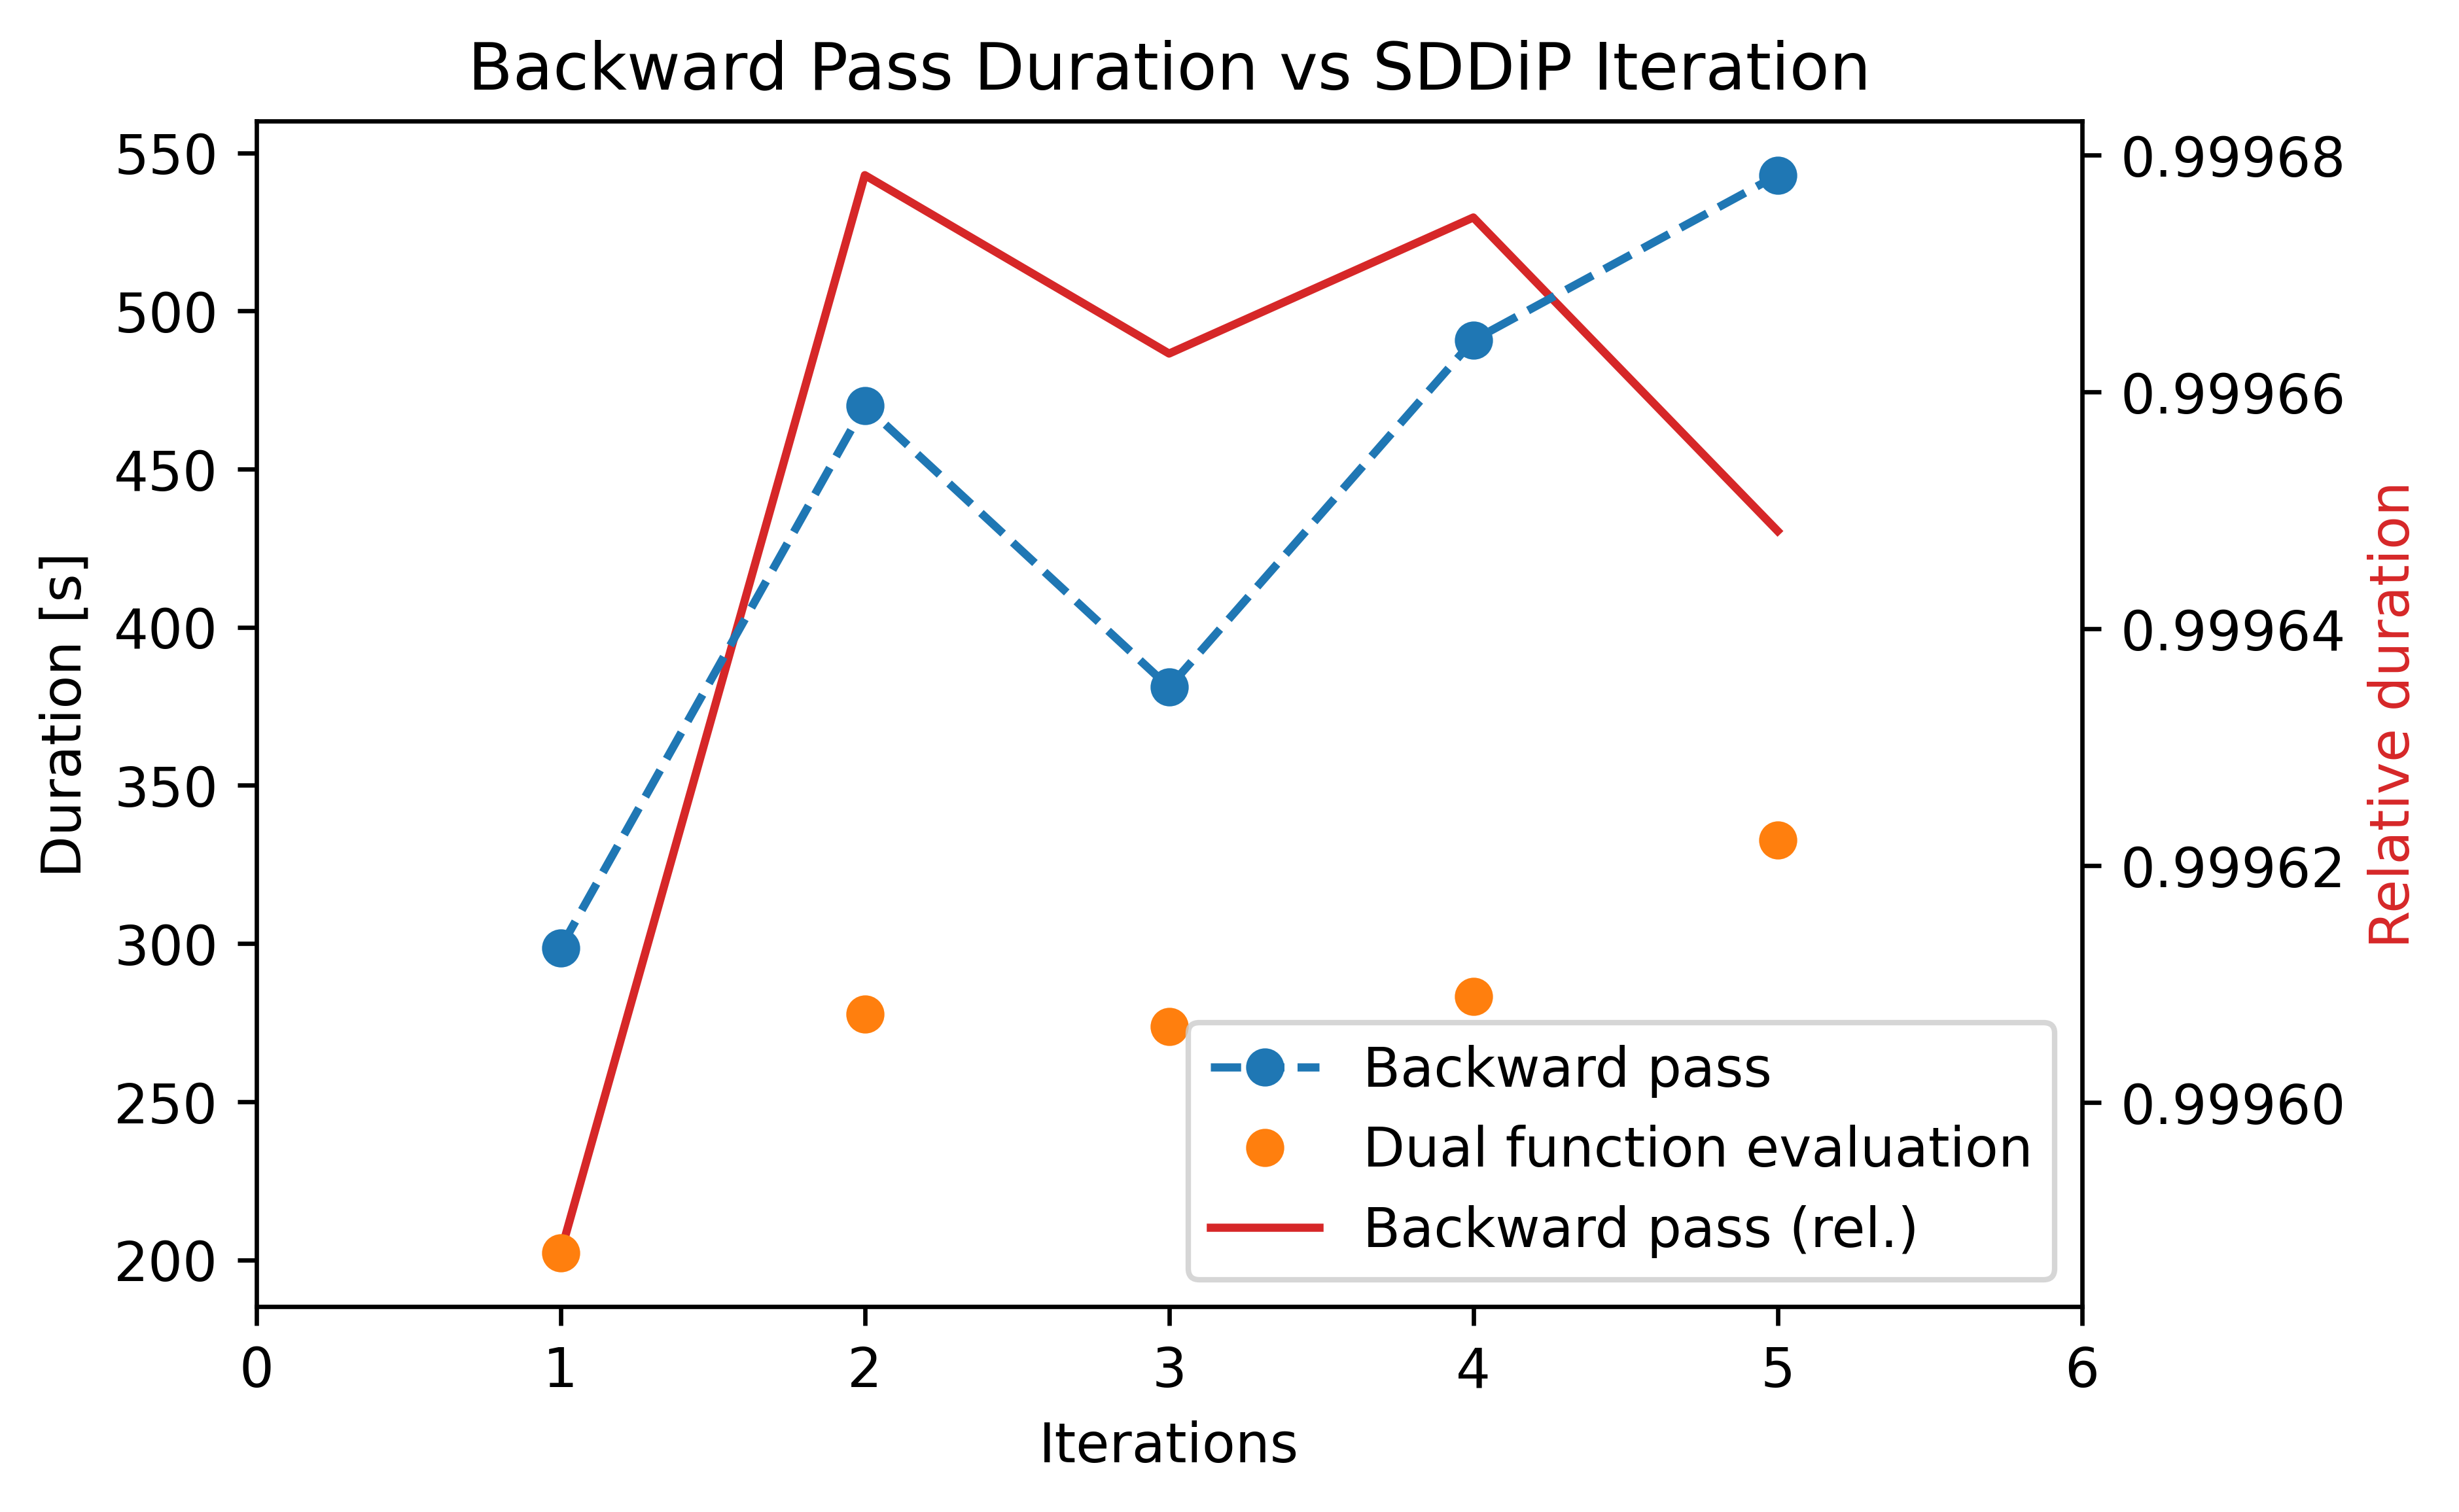

In [37]:
fig = plt.figure(dpi= 600, facecolor='w', edgecolor='k')
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_zorder(1)
ax1.set_frame_on(False)
ax2.set_zorder(0)

ax1.set_xlabel('Iterations')
ax1.set_ylabel('Duration [s]')
ax2.set_ylabel('Relative duration', color='C3')

lns1, = ax1.plot(iterations, backward_pass_durations, "--o", label="Backward pass", zorder=1)
lns2, = ax1.plot(dual_solver_iterations, dual_solver_time_per_iteration, "o", label="Dual function evaluation", zorder=2, color="C1")
lns3, = ax2.plot(iterations, relative_backward_pass_duration, color="C3", ls="-", zorder=0, label="Backward pass (rel.)")

#facecolors='none', edgecolors='C1',
#ax1.plot(iterations, backward_pass_durations, "o", ls="-", markevery=lagrange_markers)
#ax1.plot(iterations, dual_solver_time_per_iteration, "o", markevery=lagrange_markers)
lns = [lns1,lns2,lns3]
labs = [l.get_label() for l in lns]

ax1.legend(lns, labs, loc=0)
plt.xlim([0, 6])
plt.title("Backward Pass Duration vs SDDiP Iteration")
#plt.legend()
plt.show()